In [1]:
#!pip install geopandas
#!pip install seaborn

# Data Analysis Final project:

# Group 11

# Aircraft Incidents

###  Name of students:
Maxim Polak<br>
David Moshe Zohar<br>
Sahar Jerbi


<a id='top'></a>

<div>
<img src="https://github.com/Chikapikaa/Maxim_data_project/blob/main/apps.8912.14110215774207123.79232ab9-b42b-4b08-9247-97a0fc673232.jpg?raw=true" width="800"/>
</div>

## Relevent Libraries :

In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image

## Data Information :
#### The purpose of our project is to identify real problems in aircraft incident data, prevent them, and thereby save companies money.<br> 
#### Our data is sourced from the Kaggle website.

In [3]:
url = 'https://raw.githubusercontent.com/Chikapikaa/Maxim_data_project/main/Aircraft_Incident_Dataset.csv'
air_D = pd.read_csv(url)
air_D.shape

(23519, 23)

In [4]:
my_columns = air_D.columns
air_D.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


In [5]:
air_D.drop_duplicates(subset=my_columns, inplace=True)

In [6]:
air_D.shape

(23410, 23)

In [7]:
air_D.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Registration     1452
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         916
Aircaft_Damage_Type         0
Date                        0
Time                    14210
Arit                        0
Aircaft_Engines         12774
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5379
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       23063
Collision_Casualties    23118
dtype: int64

In [8]:
air_D.dtypes

Incident_Date           object
Aircaft_Model           object
Aircaft_Registration    object
Aircaft_Operator        object
Aircaft_Nature          object
Incident_Category       object
Incident_Cause(es)      object
Incident_Location       object
Aircaft_Damage_Type     object
Date                    object
Time                    object
Arit                    object
Aircaft_Engines         object
Onboard_Crew            object
Onboard_Passengers      object
Onboard_Total           object
Fatalities               int64
Aircaft_First_Flight    object
Aircraft_Phase          object
Departure_Airport       object
Destination_Airport     object
Ground_Casualties       object
Collision_Casualties    object
dtype: object

## Adding and fixing columns : 

In [9]:
air_D['Year'] = air_D['Incident_Date'].str.extract(r'(\d{4})').astype(int)
air_D['Month'] = air_D['Incident_Date'].str.replace(r'\d+', '', regex=True).str.replace('-', '')
air_D['Month'] = air_D['Month'].str.replace(r'\?', '', regex=True)

In [10]:
seasons = {
    'JAN': 'Winter',
    'FEB': 'Winter',
    'MAR': 'Spring',
    'APR': 'Spring',
    'MAY': 'Spring',
    'JUN': 'Summer',
    'JUL': 'Summer',
    'AUG': 'Summer',
    'SEP': 'Autumn',
    'OCT': 'Autumn',
    'NOV': 'Autumn',
    'DEC': 'Winter'}
air_D['Season'] = air_D['Month'].apply(lambda x: seasons[x] if x in seasons else 'Unknown')
air_D.loc[air_D.Season == 'Unknown'].head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties,Year,Month,Season
1199,??-???-2016,Cessna 500 Citation I,N628BS,Chippewa Aerospace,Unknown,Accident | hull-loss,"Collision - Object, Collision - Object - Bird",unknown,Damaged beyond repair,xx xxx 2016,...,0,1972,Unknown (UNK),?,?,NaN,NaN,2016,,Unknown
1644,??-???-2014,Antonov An-2R,UR-33587,Ukraerorukh,-,"other occurrence (ground fire, sabotage) | hul...",Result - Damaged on the ground,Lugansk Airp...,Damaged beyond repair,xx xxx 2014,...,0,NaN,Standing (STD),-,-,NaN,NaN,2014,,Unknown
1645,??-???-2014,Learjet 60XR,XA-JWM,Unknown,-,"other occurrence (ground fire, sabotage) | hul...",Result - Damaged on the ground,Fort Lauderd...,Substantial,xx xxx 2014,...,0,2012,Standing (STD),-,-,NaN,NaN,2014,,Unknown
1853,??-???-2013,Raytheon Hawker 800XP,OY-JJA,Sun-Air,Unknown,Accident | hull-loss,"Fire - Fire, Result - Damaged on the ground",Thisted Airp...,Damaged beyond repair,xx xxx 2013,...,0,2000,Standing (STD),?,?,NaN,NaN,2013,,Unknown
2024,??-???-2012,Let L-410UVP,3D-SPL,ETA Air Charter,Unknown,occurrence unknown | hull-loss,Info-Unavailable,Caia Airport...,Damaged beyond repair,xx xxx 2012,...,0,1985,Unknown (UNK),?,?,NaN,NaN,2012,,Unknown


In [11]:
pattern = r',\s*([^,]+)$'
air_D['Departure_Country'] = air_D['Departure_Airport'].str.extract(pattern, expand=False)
air_D['Destination_Country'] = air_D['Destination_Airport'].str.extract(pattern, expand=False)

In [12]:
air_D['Year_first_flight'] = air_D['Aircaft_First_Flight'].str.extract(r'(\d{4})')
air_D['Year_first_flight'] = pd.to_numeric(air_D['Year_first_flight'], errors = 'coerce')
air_D['Year_first_flight'] = air_D['Year_first_flight'].fillna(0).astype(int)

In [13]:
air_D['Years_Until_Event'] = air_D['Year'] - air_D['Year_first_flight']

In [14]:
air_D['Airplane_Model'] = air_D['Aircaft_Model'].str.split().str[0]
air_D.columns

Index(['Incident_Date', 'Aircaft_Model', 'Aircaft_Registration',
       'Aircaft_Operator', 'Aircaft_Nature', 'Incident_Category',
       'Incident_Cause(es)', 'Incident_Location', 'Aircaft_Damage_Type',
       'Date', 'Time', 'Arit', 'Aircaft_Engines', 'Onboard_Crew',
       'Onboard_Passengers', 'Onboard_Total', 'Fatalities',
       'Aircaft_First_Flight', 'Aircraft_Phase', 'Departure_Airport',
       'Destination_Airport', 'Ground_Casualties', 'Collision_Casualties',
       'Year', 'Month', 'Season', 'Departure_Country', 'Destination_Country',
       'Year_first_flight', 'Years_Until_Event', 'Airplane_Model'],
      dtype='object')

---

# Start of the Project : 

#### Some starting info : 

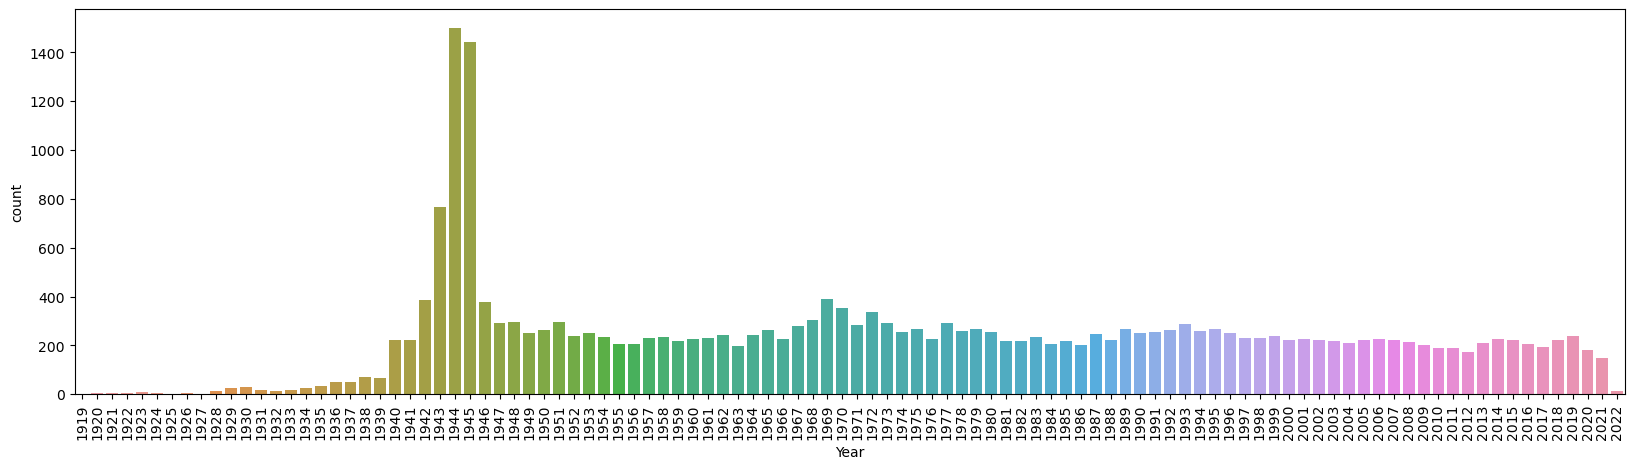

In [15]:
plt.figure(figsize = (20,5))
sns.countplot(data = air_D, x='Year')
plt.xticks(rotation=90)
plt.show()

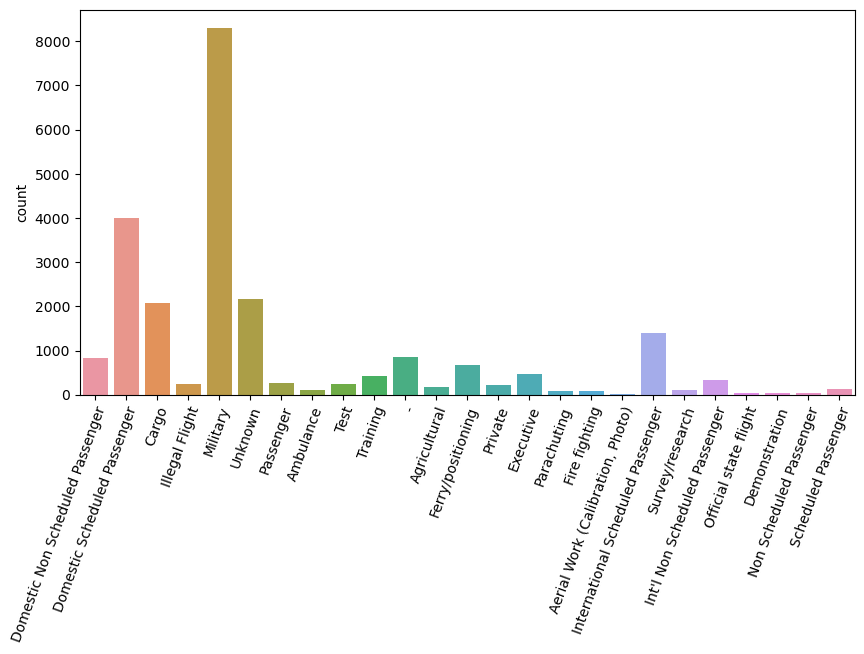

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(data = air_D, x='Aircaft_Nature')
plt.xticks(rotation=70, ha='right', rotation_mode='anchor')
plt.xlabel('')
plt.show()

We can see here the numbers of aircraft accidents each year and their types. <br>
We observe something unusual between the years 1942 and 1946.

In [17]:
filtered_1942_1946 = air_D[(air_D['Year'] >= 1942) & (air_D['Year'] <= 1946)]
filtered_1942_1946.head(5)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Ground_Casualties,Collision_Casualties,Year,Month,Season,Departure_Country,Destination_Country,Year_first_flight,Years_Until_Event,Airplane_Model
18043,01-JAN-1946,Budd RB-1 Conestoga,NC45347,National Skyway Freight,Cargo,Accident | hull-loss,"Result - Emergency, forced landing - Outside a...","Bluefield, VA",Damaged beyond repair,Tuesday 1 January 1946,...,NaN,NaN,1946,JAN,Winter,United States of America,NaN,1944,2,Budd
18044,02-JAN-1946,Douglas C-47B-11-DK (DC-3),43-49118,USAAF,Military,Accident | hull-loss,Info-Unavailable,near Canton,Damaged beyond repair,Wednesday 2 January 1946,...,NaN,NaN,1946,JAN,Winter,NaN,NaN,1944,2,Douglas
18045,04-JAN-1946,Douglas Dakota IV (DC-3),KN363,RAF,Military,Accident | hull-loss,Info-Unavailable,near Hainan Islan...,Damaged beyond repair,Friday 4 January 1946,...,NaN,NaN,1946,JAN,Winter,NaN,NaN,1945,1,Douglas
18046,05-JAN-1946,Douglas C-47A-30-DK (DC-3),43-47994,USAAF,Military,Accident | hull-loss,Info-Unavailable,"near Gumab, Masba...",Damaged beyond repair,Saturday 5 January 1946,...,NaN,NaN,1946,JAN,Winter,Philippines,NaN,1944,2,Douglas
18047,06-JAN-1946,Douglas DC-3-392,NC21786,Pennsylvania-Central Airlines,Domestic Scheduled Passenger,Accident | hull-loss,Result - Runway excursion,Birmingham A...,Damaged beyond repair,Sunday 6 January 1946,...,NaN,NaN,1946,JAN,Winter,United States of America,United States of America,1941,5,Douglas


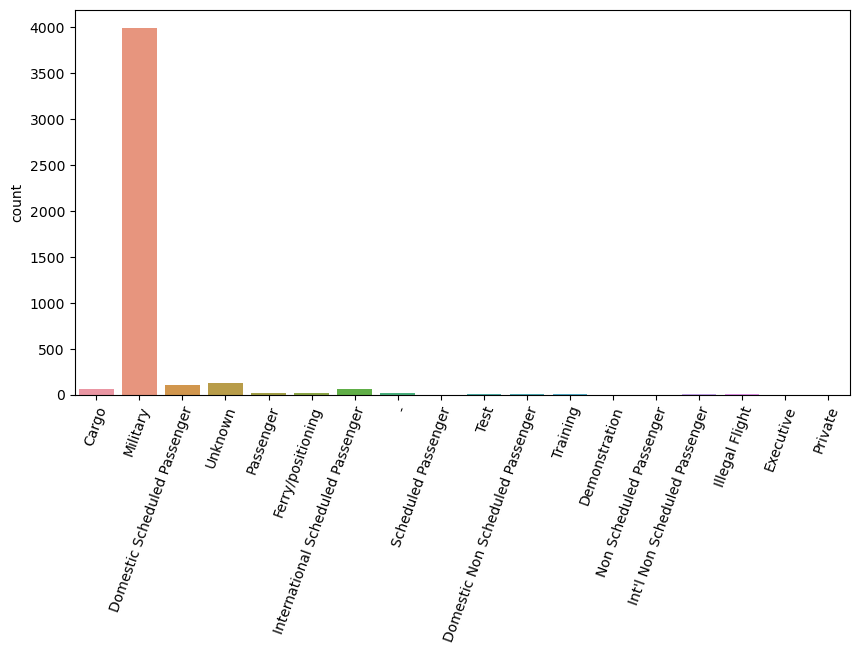

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(data = filtered_1942_1946, x='Aircaft_Nature')
plt.xticks(rotation=70, ha='right', rotation_mode='anchor')
plt.xlabel('')
plt.show()

We see that between 1942 and 1946, most of the aircraft accidents involved military aircraft.<br>
We can understand that this was due to World War II occurring during those years, leading to a significant increase in aircraft accidents.

In [19]:
filtered_1949 = air_D[(air_D['Year'] >= 1949)]
filtered_2010 = air_D[(air_D['Year'] >= 2010)]
filtered_2015 = air_D[(air_D['Year'] >= 2015)]

#### We filtered the data by years to obtain quality data for our analysis.

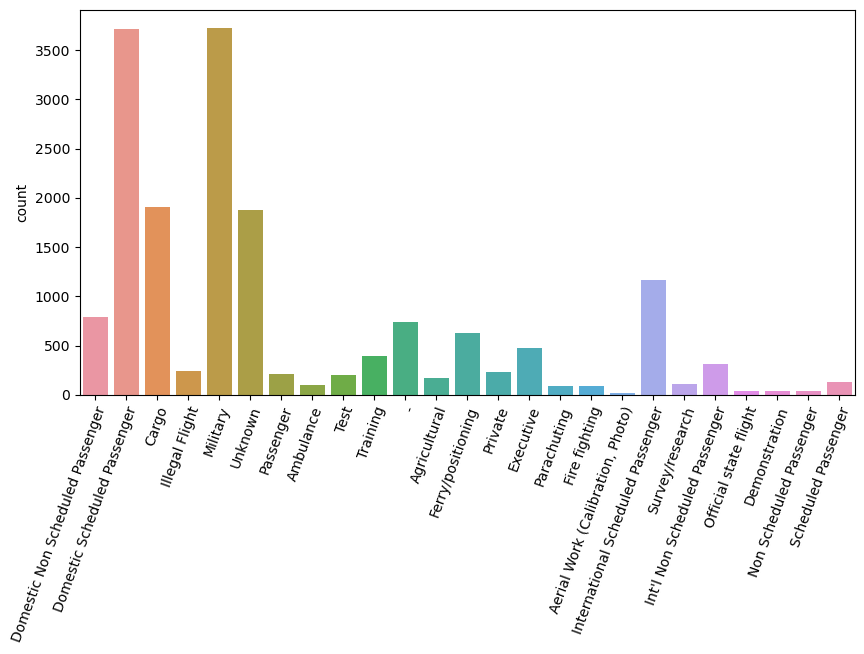

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(data = filtered_1949, x='Aircaft_Nature')
plt.xticks(rotation=70, ha='right', rotation_mode='anchor')
plt.xlabel('')
plt.show()

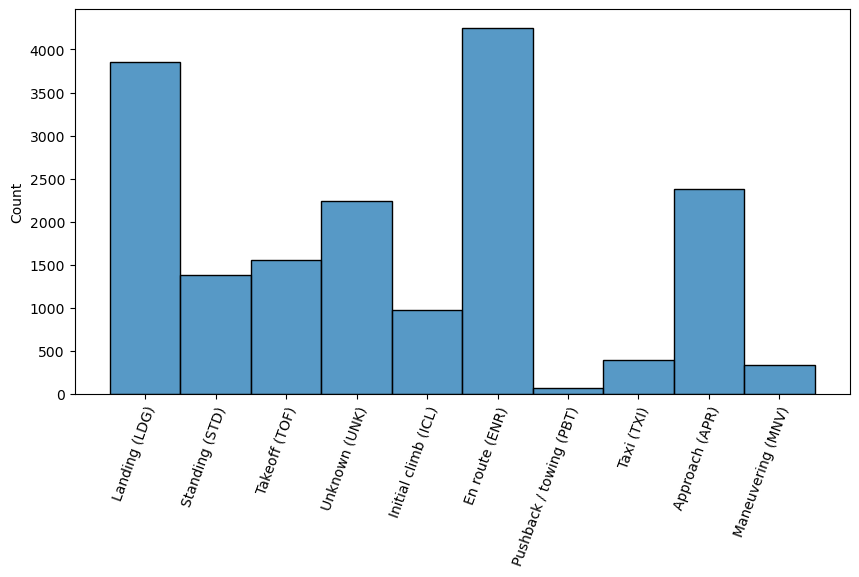

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=filtered_1949, x='Aircraft_Phase', bins=10)
plt.xticks(rotation=70, ha='right', rotation_mode='anchor')
plt.xlabel('')
plt.show()

 We can see that the gap previously observed with military-type accidents has decreased. <br>
 We are displaying, in general, on the graph, the phase of flight during which the accident occurred.

In [22]:
mostDestination_landing = filtered_1949[filtered_1949['Aircraft_Phase'].str.contains("landing", na=False, case=False)]\
.groupby('Destination_Country').size().sort_values(ascending=False).reset_index(name = '').head(5)
mostDestination_landing

,Destination_Country,
0,United States of America,730
1,Canada,196
2,Russia,160
3,United Kingdom,153
4,Brazil,137


In [23]:
mostDestination_takeoff = filtered_1949[filtered_1949['Aircraft_Phase'].str.contains("Takeoff", na=False, case=False)]\
.groupby('Departure_Country').size().sort_values(ascending=False).reset_index(name = '').head(5)
mostDestination_takeoff

,Departure_Country,
0,United States of America,354
1,Russia,108
2,Canada,62
3,Brazil,49
4,United Kingdom,46


 We can see the most common countries where landing and takeoff accidents occur.

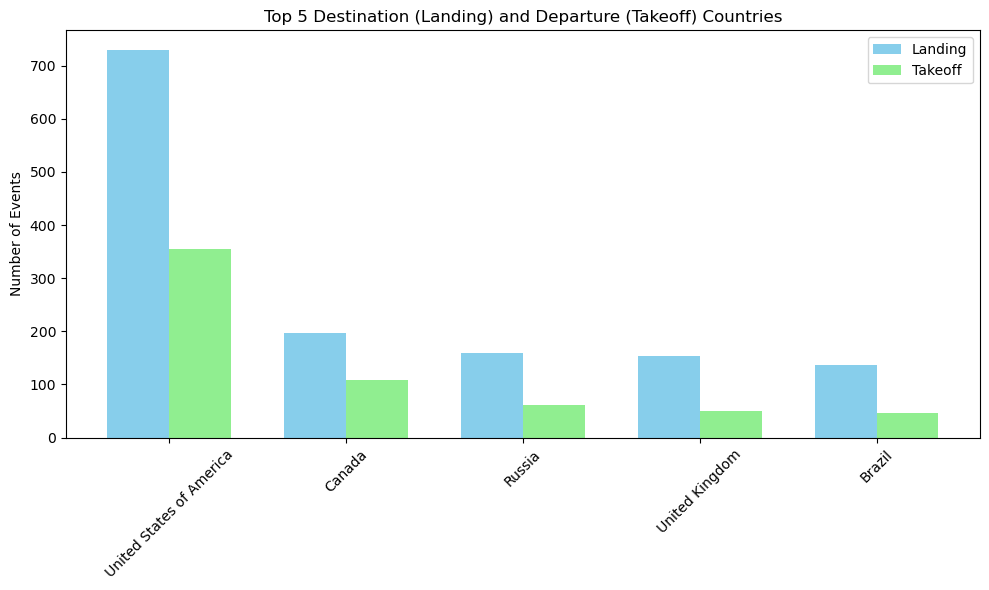

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
landing_positions = np.arange(len(mostDestination_landing))
takeoff_positions = [x + bar_width for x in landing_positions]
ax.bar(landing_positions, mostDestination_landing[''], bar_width, label='Landing', color='skyblue')
ax.bar(takeoff_positions, mostDestination_takeoff[''], bar_width, label='Takeoff', color='lightgreen')
ax.set_ylabel('Number of Events')
ax.set_title('Top 5 Destination (Landing) and Departure (Takeoff) Countries')
ax.set_xticks([x + bar_width / 2 for x in range(len(mostDestination_landing))])
ax.set_xticklabels(mostDestination_landing['Destination_Country'])
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see on the graph that most of the accidents occurred during landing rather than takeoff.

In [25]:
mostDestination_Season = filtered_1949[filtered_1949['Aircraft_Phase'].str.contains("landing", na=False, case=False) & filtered_1949['Destination_Country'].str.contains("United States of America", na=False, case=False)]\
.groupby('Season').size().sort_values(ascending=False).reset_index(name = '').head(4)

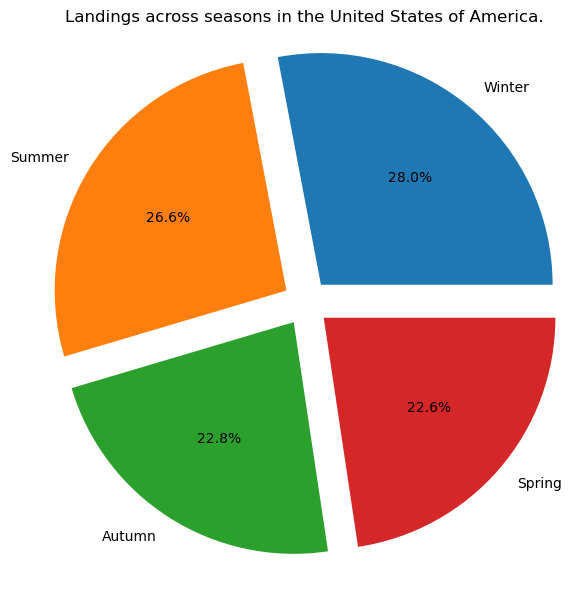

In [26]:
gap = (0.1, 0.1, 0.1, 0.1) 
plt.figure(figsize=(6, 6))
plt.pie(mostDestination_Season[''], labels=mostDestination_Season['Season'], autopct='%1.1f%%', explode = gap)
plt.title('Landings across seasons in the United States of America.')
plt.axis('equal')
plt.tight_layout()
plt.show()

We can see that the season has no effect on landing plane crashes and accidents.

In [27]:
Hijacking_D = filtered_1949[filtered_1949['Incident_Category'].str.startswith('Hijacking')]

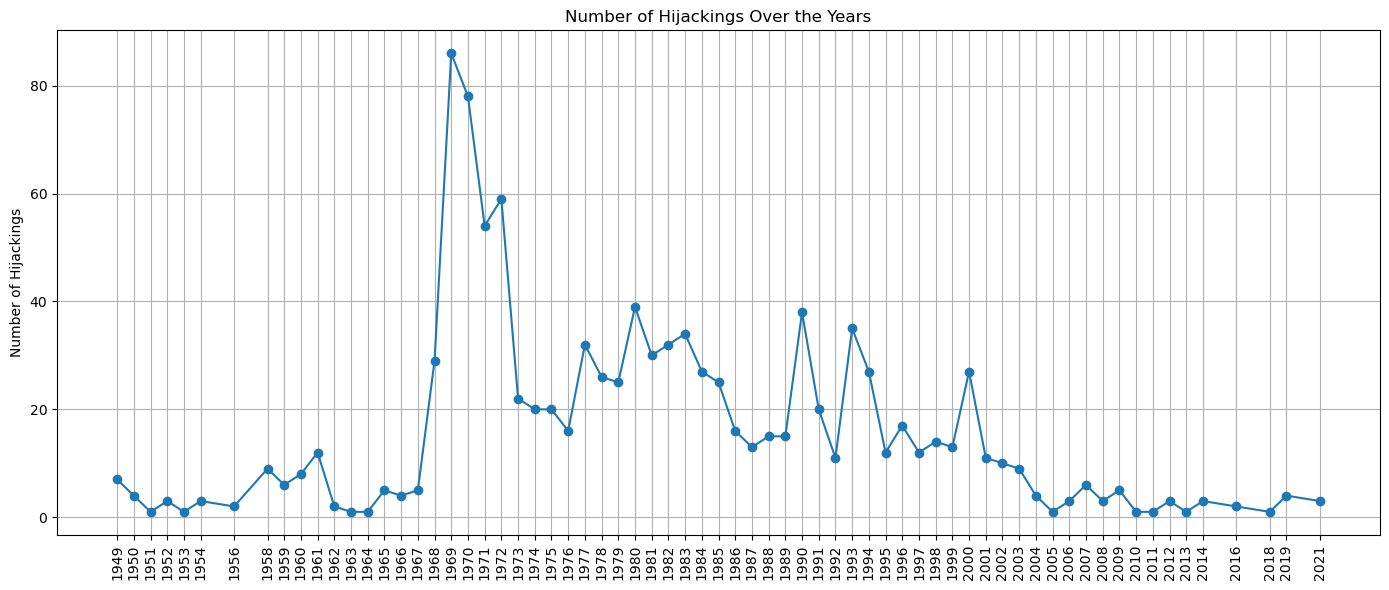

In [28]:
import matplotlib.pyplot as plt

hijacking_counts = Hijacking_D['Year'].value_counts().sort_index()


plt.figure(figsize=(14, 6))
plt.plot(hijacking_counts.index, hijacking_counts.values, marker='o', linestyle='-')
plt.title('Number of Hijackings Over the Years')
plt.ylabel('Number of Hijackings')
plt.xticks(hijacking_counts.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()



This graph presents the number of hijackings from 1949, and we can observe a significant increase between 1967 and 1973.

In [29]:
Hijacking_1967_1973 = filtered_1949[(filtered_1949['Year'] >= 1967) & (air_D['Year'] <= 1973)]

/var/folders/sc/2ys5gxls2sxcb7y22zqddgd00000gn/T/ipykernel_3390/1693077502.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Hijacking_1967_1973 = filtered_1949[(filtered_1949['Year'] >= 1967) & (air_D['Year'] <= 1973)]


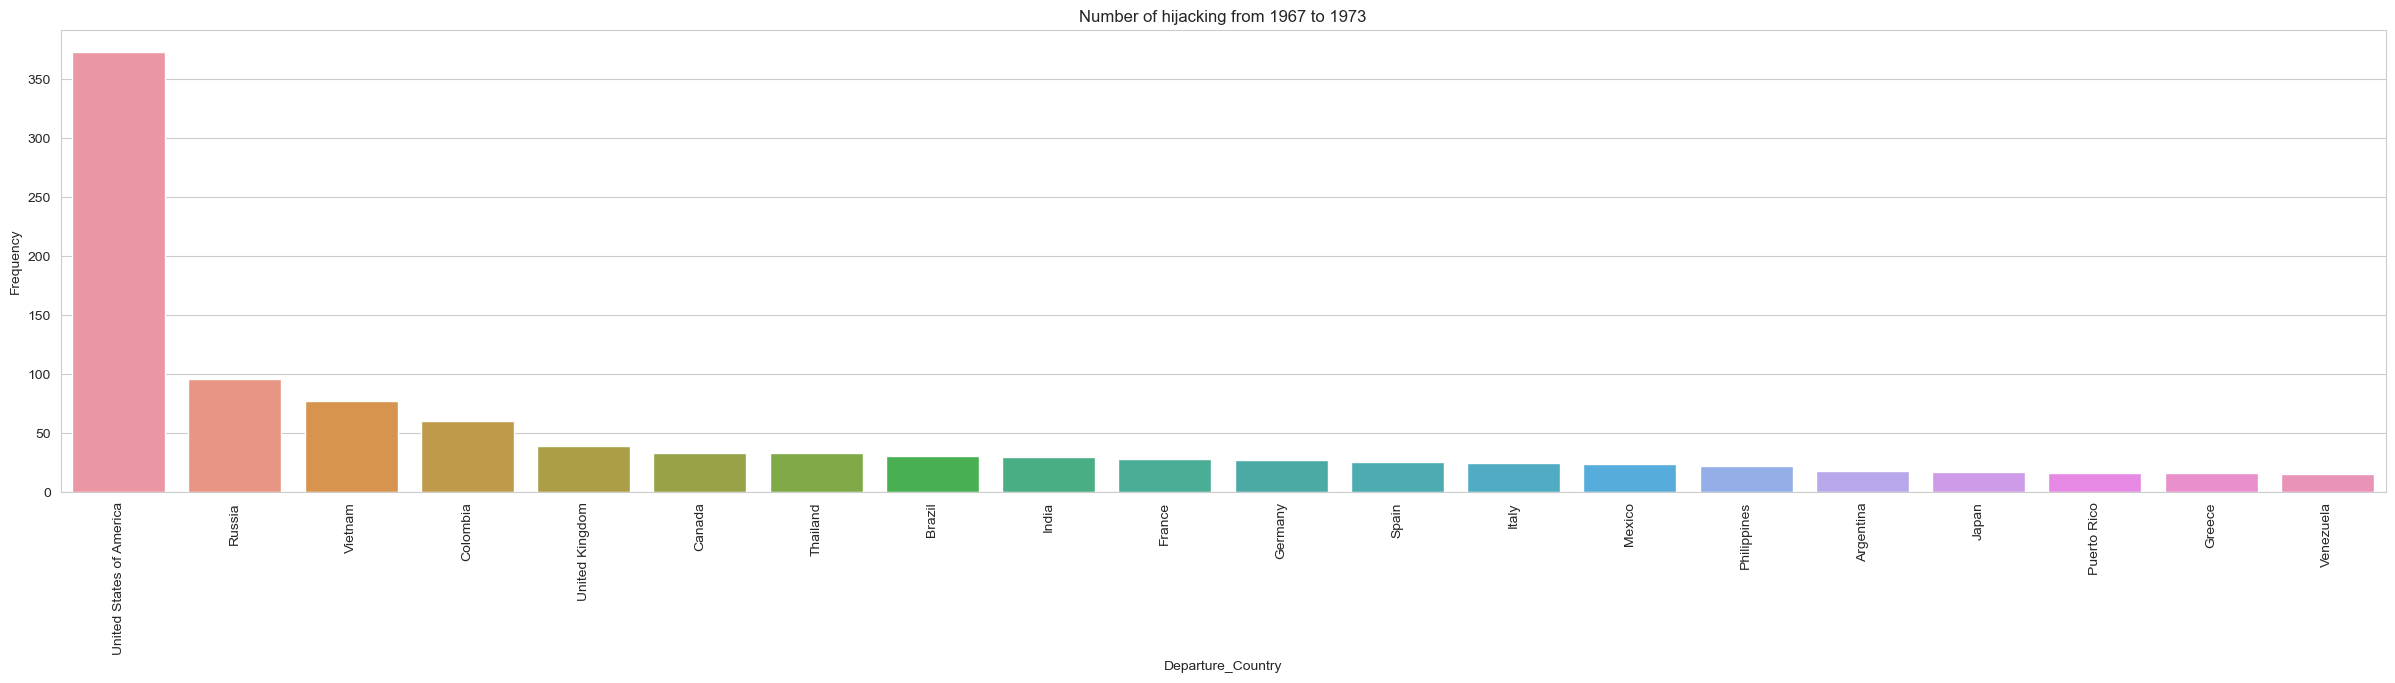

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(30, 6))
sns.countplot(data=Hijacking_1967_1973, x='Departure_Country', order=Hijacking_1967_1973['Departure_Country'].value_counts().nlargest(20).index)
plt.title('Number of hijacking from 1967 to 1973')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

We can see that there is a significant difference between the years 1967 and 1973 in airplane hijackings in the USA to the rest of the world

This happened becouse that there were no magnetometers in airports until 1973,It was due to the airlines' fear that installing them would cause alarm among passengers boarding the plane, as they might perceive the presence of magnetometers as an indication of potential danger aboard the flight.

And following the rise of communist Cuba to power, and the US government's fear of American citizens being kidnapped to Cuba, which prompted a quick release of funds to free the abductees from their kidnappers.

Which, due to both reasons, caused easy kidnappings and 'easy money' for the kidnappers.

In [31]:
filtered_2015['Incident_Cause(es)'] = filtered_2015['Incident_Cause(es)'].str.replace(r'(?i).*Collision.*', 'Collision', regex=True)

/var/folders/sc/2ys5gxls2sxcb7y22zqddgd00000gn/T/ipykernel_3390/663025120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_2015['Incident_Cause(es)'] = filtered_2015['Incident_Cause(es)'].str.replace(r'(?i).*Collision.*', 'Collision', regex=True)


We have included in the column detailing the causes of the accident anyone with the word sequence "Collision" and changed it to simply "Collision". <br>
This adjustment aims to facilitate and clarify our work.

/var/folders/sc/2ys5gxls2sxcb7y22zqddgd00000gn/T/ipykernel_3390/964656794.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


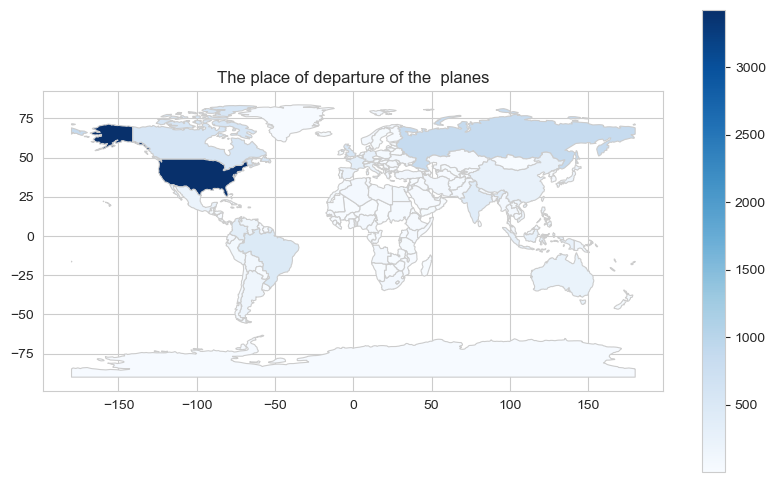

In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
country_data = air_D['Departure_Country']
country_counts = country_data.value_counts()
world_merged = world.merge(country_counts, how='left', left_on='name', right_index=True)
fig, ax = plt.subplots(figsize=(10, 6))
world_merged.plot(column='Departure_Country', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('The place of departure of the  planes')
plt.show()


We can see that most of the crashes are in the USA,so we only took the US airports.

In [33]:
us_airports_count = filtered_2015[(filtered_2015['Destination_Country'] == 'United States of America') | (filtered_2015['Departure_Country'] == 'United States of America')]['Incident_Location'].value_counts().reset_index().head(5)
us_airports_count

,index,Incident_Location
0,New York-Joh...,8
1,Chicago-O'Ha...,7
2,Charlotte-Do...,6
3,Fort Lauderd...,6
4,Baltimore/Wa...,5


We are checking the most popular locations for accidents within the USA since 2015, <br>
and we are focusing on two specific airports: New York John F. Kennedy and Chicago O'Hare.

In [34]:
filtered_2015[filtered_2015['Incident_Location'].str.contains("New York-Joh...")]['Incident_Cause(es)'].reset_index()

,index,Incident_Cause(es)
0,394,Result - Runway mishap
1,654,Collision
2,655,Collision
3,904,Collision
4,905,Collision
5,974,Collision
6,975,Collision
7,1113,Result - Damaged on the ground


In [35]:
filtered_2015[filtered_2015['Incident_Location'].str.contains("Chicago-O'Ha...")]['Incident_Cause(es)'].reset_index()

,index,Incident_Cause(es)
0,540,Result - Runway excursion
1,700,Result - Damaged on the ground
2,882,Collision
3,883,Collision
4,994,Result - Damaged on the ground
5,1157,"Airplane - Engines, Airplane - Engines - Uncon..."
6,1325,"Result - Damaged on the ground, Weather - Wind..."


We are comparing the incident causes between both of them to see if there are any specific problems at either location.

/var/folders/sc/2ys5gxls2sxcb7y22zqddgd00000gn/T/ipykernel_3390/1739661441.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


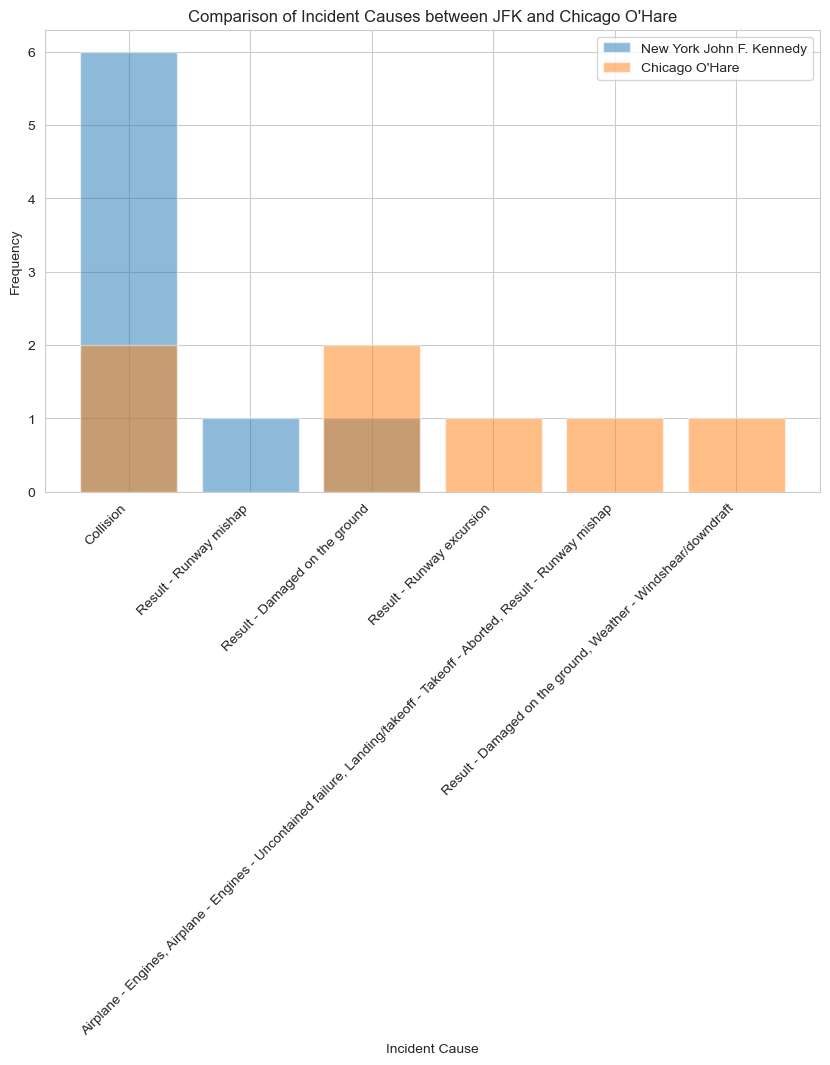

In [36]:
jfk_incidents = filtered_2015[filtered_2015['Incident_Location'].str.contains("New York-Joh...")]['Incident_Cause(es)']
ohare_incidents = filtered_2015[filtered_2015['Incident_Location'].str.contains("Chicago-O'Ha...")]['Incident_Cause(es)']
jfk_incident_counts = jfk_incidents.value_counts()
ohare_incident_counts = ohare_incidents.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(jfk_incident_counts.index, jfk_incident_counts.values, alpha=0.5, label='New York John F. Kennedy')
plt.bar(ohare_incident_counts.index, ohare_incident_counts.values, alpha=0.5, label="Chicago O'Hare")
plt.xlabel('Incident Cause')
plt.ylabel('Frequency')
plt.title('Comparison of Incident Causes between JFK and Chicago O\'Hare')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Observation 1:

**We see that there is a repetitive problem with collision incidents at New York airports.**

**Preventing collision accidents involves implementing a combination of strategies aimed at increasing awareness, improving infrastructure, enhancing regulations, and promoting safety measures. Here are some effective ways to prevent collision accidents:**

**1. Education and Training: Provide comprehensive education and training programs for airport workers to ensure they understand proper procedures for ground operations, including the prevention of collisions.**

**2. Infrastructure Improvements: Enhance the airport's infrastructure by implementing measures such as clear signage, improved lighting, installation of traffic control devices, and the use of runway markings and barriers to prevent collisions.**

**By addressing these aspects, the airport can significantly reduce the occurrence of ground collisions, thereby improving safety, minimizing financial losses, and enhancing overall efficiency.**

---

### Now we want to see what the top airplane models are that have the most aircraft incidents since 2015.

In [37]:
airport_counts_model = filtered_2015['Airplane_Model'].value_counts().reset_index()
airport_counts_model.columns = ['Airplane_Model', 'Count'] 
top_10_models = airport_counts_model.head(10)
top_10_models

,Airplane_Model,Count
0,Cessna,225
1,Boeing,172
2,Beechcraft,154
3,Antonov,135
4,Airbus,96
5,de,88
6,British,46
7,Learjet,36
8,Embraer,36
9,ATR,35


In [38]:
Boeing = filtered_2015[filtered_2015['Airplane_Model']=='Boeing']
airport_counts_boeing= Boeing[['Incident_Cause(es)']].value_counts().reset_index()
airport_counts_boeing.head(10)

,Incident_Cause(es),0
0,Collision,44
1,Result - Damaged on the ground,17
2,Result - Runway excursion,15
3,"Airplane - Undercarriage, Airplane - Undercarr...",12
4,"Landing/takeoff - Tailstrike, Result - Runway ...",12
5,"Landing/takeoff - Landing, Landing/takeoff - L...",5
6,Info-Unavailable,4
7,Result - Loss of control,4
8,"Airplane - Engines, Airplane - Engines - Uncon...",3
9,"Airplane - Undercarriage, Result - Runway mishap",3


In [39]:
Airbus = filtered_2015[filtered_2015['Airplane_Model']=='Airbus']
airport_counts_Airbus = Airbus[['Incident_Cause(es)']].value_counts().reset_index()
airport_counts_Airbus.head(10)

,Incident_Cause(es),0
0,Collision,26
1,Result - Damaged on the ground,22
2,"Landing/takeoff - Tailstrike, Result - Runway ...",8
3,Result - Runway excursion,6
4,Result - Loss of control,3
5,"Airplane - Undercarriage, Airplane - Undercarr...",2
6,Info-Unavailable,2
7,"Landing/takeoff - Landing, Landing/takeoff - L...",2
8,Result - Hijacking - Peaceful surrender / arre...,2
9,Result - Runway mishap,2


There are two specific airplane models that we are focusing on: "Airbus" and "Boeing". <br> 
These two airplane models are among the most popular models used by airline companies, owning very large airplanes.

In [40]:
landing_Undercarriage = filtered_2015[filtered_2015['Incident_Cause(es)'].str.contains('Undercarriage')]

We are gathering all our data that pertains to the cause of the incident, specifically focusing on "Undercarriage". <br> 
The undercarriage is the part, including the wheels, that supports the airplane when it is on the ground, during landing or takeoff.

In [41]:
airport_counts_model = landing_Undercarriage['Airplane_Model'].value_counts().reset_index()
airport_counts_model.columns = ['Airplane_Model', 'Count']
top_10_models = airport_counts_model.head(10)
top_10_models

,Airplane_Model,Count
0,Beechcraft,37
1,Boeing,30
2,Cessna,19
3,de,11
4,Airbus,8
5,Embraer,6
6,Fokker,6
7,Learjet,5
8,ATR,4
9,British,3


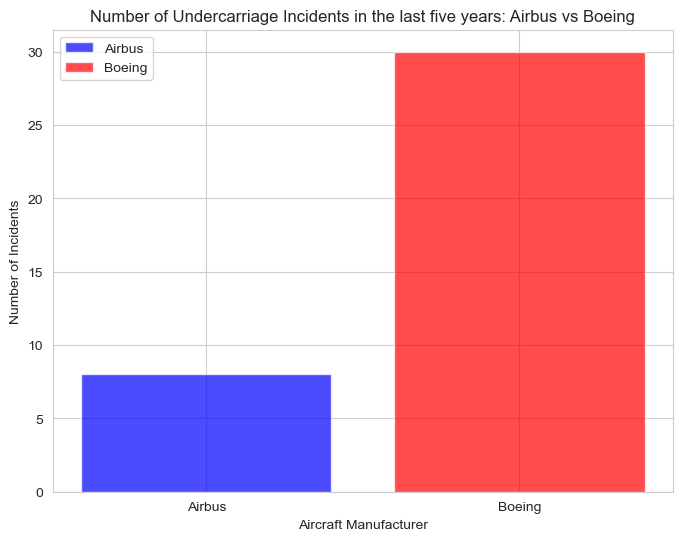

In [42]:
airbus_undercarriage_count = len(Airbus[Airbus['Incident_Cause(es)'].str.contains('Undercarriage', case=False)])
boeing_undercarriage_count = len(Boeing[Boeing['Incident_Cause(es)'].str.contains('Undercarriage', case=False)])
plt.figure(figsize=(8, 6))
plt.bar('Airbus', airbus_undercarriage_count, color='blue', alpha=0.7, label='Airbus')
plt.bar('Boeing', boeing_undercarriage_count, color='red', alpha=0.7, label='Boeing')
plt.title('Number of Undercarriage Incidents in the last five years: Airbus vs Boeing')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

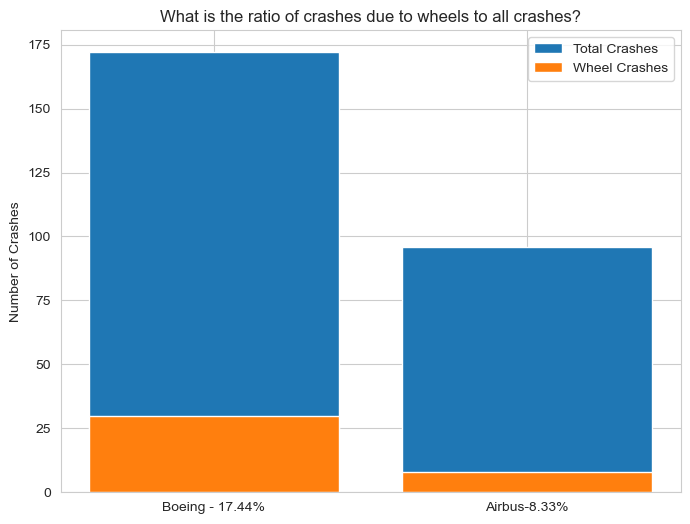

In [43]:
things = ['Boeing - 17.44%', 'Airbus-8.33%']
total_crashes = [172, 96]
wheel_crashes = [30, 8]
plt.figure(figsize=(8, 6))
plt.bar(things, total_crashes, label='Total Crashes')
plt.bar(things, wheel_crashes, label='Wheel Crashes')
plt.ylabel('Number of Crashes')
plt.title('What is the ratio of crashes due to wheels to all crashes?')
plt.legend()
plt.show()

We can see that there are significantly more undercarriage incidents on the aircraft model "Boeing" than on "Airbus", <br>
and the percentage of undercarriage incidents from all crashes is twice as low on the "Airbus" model.

In [44]:
Airbus_landing_Undercarriage = Airbus[Airbus['Incident_Cause(es)'].str.contains('Undercarriage')]
Airbus_landing_Undercarriage.shape
Boeing_landing_Undercarriage = Boeing[Boeing['Incident_Cause(es)'].str.contains('Undercarriage')]

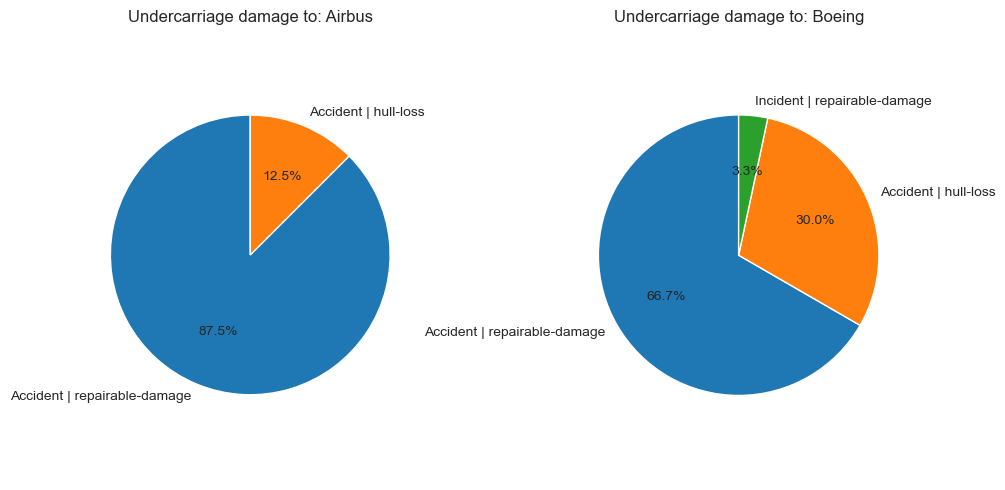

In [45]:
titles = ['Airbus', 'Boeing']
data = [Airbus_landing_Undercarriage, Boeing_landing_Undercarriage]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, data, title in zip(axs, data, titles):
    counts = data['Incident_Category'].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Undercarriage damage to: {title}')
    ax.axis('equal')
plt.tight_layout()
plt.show()

# Observation 2:

**Today, 99% of aֿll planes used by major airlines are manufactured by Boeing and Airbus.**

**An undercarriage repair of a Boeing aircraft can cost anywhere from `$20,000` for minor repairs or servicing to `$500,000` for extensive repairs, and even `$1 million` for a complete replacement of the landing gear.**


**In a serious case of total destruction of the plane, we encounter sums ranging between `$89 million` and `$442 million`.**


**In addition, the cost of a minute of delay for a large airline increases, on average, by $75. Consequently, the company incurs additional expenses for the repair of the plane, even for each minute that the aircraft is not in the sky.**

**Based on what we have seen here, we recommend that large airlines, which are debating between buying Boeing and Airbus aircraft, consider only the accidents that have occurred due to mechanical problems with the plane in the last five years and opt to purchase from the Airbus company.**

<a id='top'></a>

<div>
<img src="https://github.com/Chikapikaa/Maxim_data_project/blob/main/777x-hero_1280x720.jpg?raw=true" width="800"/>
</div>

---

### Now we want to see which engine models have had the most aircraft incidents specifically related to engine problems since 2010.

In [46]:
filtered_2010['Incident_Cause(es)'] = filtered_2010['Incident_Cause(es)'].str.replace(r'(?i).*engine.*', 'Engine Problem', regex=True)
filtered_2010.head(3)

/var/folders/sc/2ys5gxls2sxcb7y22zqddgd00000gn/T/ipykernel_3390/2756774406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_2010['Incident_Cause(es)'] = filtered_2010['Incident_Cause(es)'].str.replace(r'(?i).*engine.*', 'Engine Problem', regex=True)


,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Ground_Casualties,Collision_Casualties,Year,Month,Season,Departure_Country,Destination_Country,Year_first_flight,Years_Until_Event,Airplane_Model
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,Engine Problem,near Venetia Mine...,Substantial,Monday 3 January 2022,...,NaN,NaN,2022,JAN,Winter,South Africa,South Africa,1995,27,British
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,NaN,NaN,2022,JAN,Winter,Honduras,Honduras,1985,37,British
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,NaN,NaN,2022,JAN,Winter,Iran,Iran,1992,30,Boeing


We gathered all the information concerning the causes of the incidents, and wherever the word "engine" was found, <br>
we categorized it under the same category of "Engine Problem" to make it more organized.

In [47]:
engine_problem_data_2010 = filtered_2010[filtered_2010['Incident_Cause(es)'].str.contains('Engine problem', case=False)]
engine_problem_data_2010.head(3)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Ground_Casualties,Collision_Casualties,Year,Month,Season,Departure_Country,Destination_Country,Year_first_flight,Years_Until_Event,Airplane_Model
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,Engine Problem,near Venetia Mine...,Substantial,Monday 3 January 2022,...,NaN,NaN,2022,JAN,Winter,South Africa,South Africa,1995,27,British
38,26-FEB-2021,Antonov An-2T,UP-A0351,Asia Continental Airlines,Ambulance,Accident | hull-loss,Engine Problem,near Boraldai,Substantial,Friday 26 February 2021,...,NaN,NaN,2021,FEB,Winter,Kazakhstan,Kazakhstan,0,2021,Antonov
42,02-MAR-2021,Let L-410UVP-E,(HK-4274),South Sudan Supreme Airlines,Domestic Non Scheduled Passenger,Accident | hull-loss,Engine Problem,Pieri,Destroyed,Tuesday 2 March 2021,...,NaN,NaN,2021,MAR,Spring,South Sudan,South Sudan,1990,31,Let


In [48]:
most_model_2010 = filtered_2010[["Aircaft_Engines"]].value_counts().reset_index()
most_model_2010.head(5)

,Aircaft_Engines,0
0,1 Pratt Whitney Canada PT6A-114A,137
1,1 Shvetsov ASh-62IR,63
2,2 Pratt Whitney Canada PT6A-27,48
3,2 CFMI CFM56-3C1,36
4,2 CFMI CFM56-7B26,33


We are checking which engine has had the most incidents since 2010, and we are curious about a specific engine called "Shvetsov."

In [49]:
filtered_2010[filtered_2010['Aircaft_Engines'].str.contains("Shvetsov", na=False, case=False)]\
.groupby('Incident_Cause(es)').size().sort_values(ascending=False).reset_index(name='counts').head(5)

,Incident_Cause(es),counts
0,Engine Problem,20
1,"Result - Emergency, forced landing - Outside a...",11
2,Result - Loss of control,4
3,Result - Damaged on the ground,4
4,Info-Unavailable,3


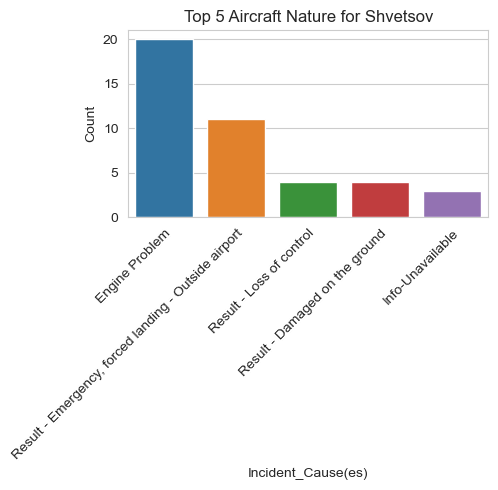

In [50]:
filtered_data = filtered_2010[filtered_2010['Aircaft_Engines'].str.contains("Shvetsov", na=False, case=False)]
grouped_data = filtered_data.groupby('Incident_Cause(es)').size().sort_values(ascending=False).reset_index(name='counts')
top_5 = grouped_data.head(5)
plt.figure(figsize=(5, 5))
sns.barplot(data=top_5, x='Incident_Cause(es)', y='counts')
plt.title('Top 5 Aircraft Nature for Shvetsov')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

The graph shows us that since 2010, most of the incidents involving "Shvetsov" engines were due to engine problems.

#### Now we are comparing this with the same data but over a larger range of years. We are now looking at the years from 1949.

In [51]:
filtered_1949['Incident_Cause(es)'] = filtered_1949['Incident_Cause(es)'].str.replace(r'(?i).*engine.*', 'Engine Problem', regex=True)

/var/folders/sc/2ys5gxls2sxcb7y22zqddgd00000gn/T/ipykernel_3390/3611847190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_1949['Incident_Cause(es)'] = filtered_1949['Incident_Cause(es)'].str.replace(r'(?i).*engine.*', 'Engine Problem', regex=True)


In [52]:
engine_problem_data_1949 = filtered_1949[filtered_1949['Incident_Cause(es)'].str.contains('Engine problem', case=False)]
engine_problem_data_1949.head(3)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Ground_Casualties,Collision_Casualties,Year,Month,Season,Departure_Country,Destination_Country,Year_first_flight,Years_Until_Event,Airplane_Model
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,Engine Problem,near Venetia Mine...,Substantial,Monday 3 January 2022,...,NaN,NaN,2022,JAN,Winter,South Africa,South Africa,1995,27,British
38,26-FEB-2021,Antonov An-2T,UP-A0351,Asia Continental Airlines,Ambulance,Accident | hull-loss,Engine Problem,near Boraldai,Substantial,Friday 26 February 2021,...,NaN,NaN,2021,FEB,Winter,Kazakhstan,Kazakhstan,0,2021,Antonov
42,02-MAR-2021,Let L-410UVP-E,(HK-4274),South Sudan Supreme Airlines,Domestic Non Scheduled Passenger,Accident | hull-loss,Engine Problem,Pieri,Destroyed,Tuesday 2 March 2021,...,NaN,NaN,2021,MAR,Spring,South Sudan,South Sudan,1990,31,Let


In [53]:
most_model_1949 = filtered_1949[["Aircaft_Engines"]].value_counts().reset_index()
most_model_1949.head(15)

,Aircaft_Engines,0
0,2 Pratt Whitney R-1830-92,659
1,2 Pratt Whitney Canada PT6A-27,288
2,1 Pratt Whitney Canada PT6A-114A,257
3,2 Pratt Whitney R-1830-90C,248
4,2 Pratt Whitney R-2800-51,152
5,4 Ivchenko AI-20M,125
6,4 Pratt Whitney JT3D-3B,119
7,3 Ivchenko AI-25,116
8,2 Pratt Whitney Canada PT6A-20,105
9,2 Ivchenko AI-24VT,95


As we can see, from 1949, "Shvetsov" engines had 85 accidents, which is only 22 more than if we look at the years from 2010. <br>
So it seems that something happened in the last decade.

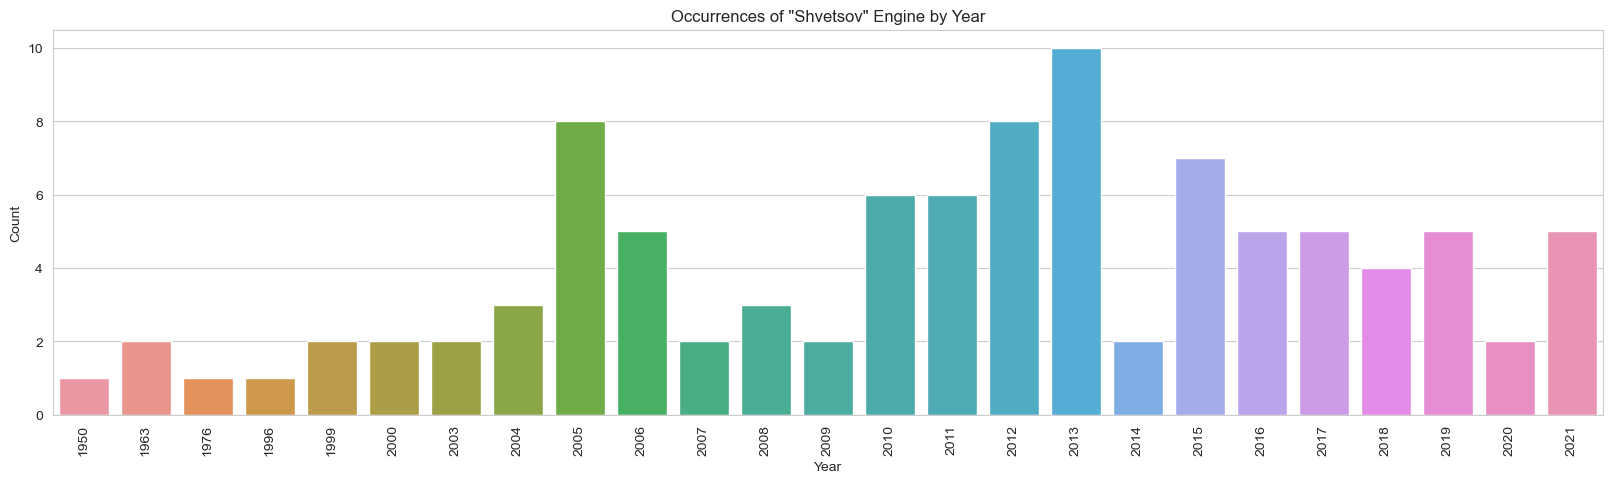

In [54]:
filtered_1949_cleaned = filtered_1949.dropna(subset=['Aircaft_Engines'])
shvetsov_data = filtered_1949_cleaned[filtered_1949_cleaned['Aircaft_Engines'].str.contains('Shvetsov')]
plt.figure(figsize=(20, 5))
sns.countplot(data=shvetsov_data, x='Year')
plt.xticks(rotation=90)
plt.title('Occurrences of "Shvetsov" Engine by Year')
plt.ylabel('Count')
plt.show()

Graph showing the years when the incidents happened with the "Shvetsov" engine.

In [55]:
count_shvetsov_data = shvetsov_data.groupby('Year_first_flight')['Aircaft_Engines'].count().reset_index()
count_shvetsov_data.drop(0)

,Year_first_flight,Aircaft_Engines
1,1949,1
2,1952,1
3,1955,1
4,1957,1
5,1958,1
6,1960,1
7,1961,1
8,1962,1
9,1967,1
10,1968,2


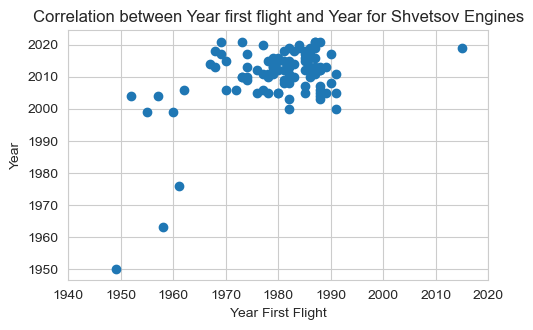

In [56]:
plt.figure(figsize=(3, 5))
plt.scatter(shvetsov_data['Year_first_flight'], shvetsov_data['Year'])
plt.title('Correlation between Year first flight and Year for Shvetsov Engines')
plt.xlabel('Year First Flight')
plt.ylabel('Year')
plt.xlim(1940, 2020)
plt.subplots_adjust(left=0.1, right=1.5, top=0.6, bottom=0.1)
plt.grid(True)
plt.show()

#### The graph illustrates that most airplanes first flights with "Shvetsov" engines were between the years 1970 to 1990, and most incidents occurred between the years 2005 to 2020.

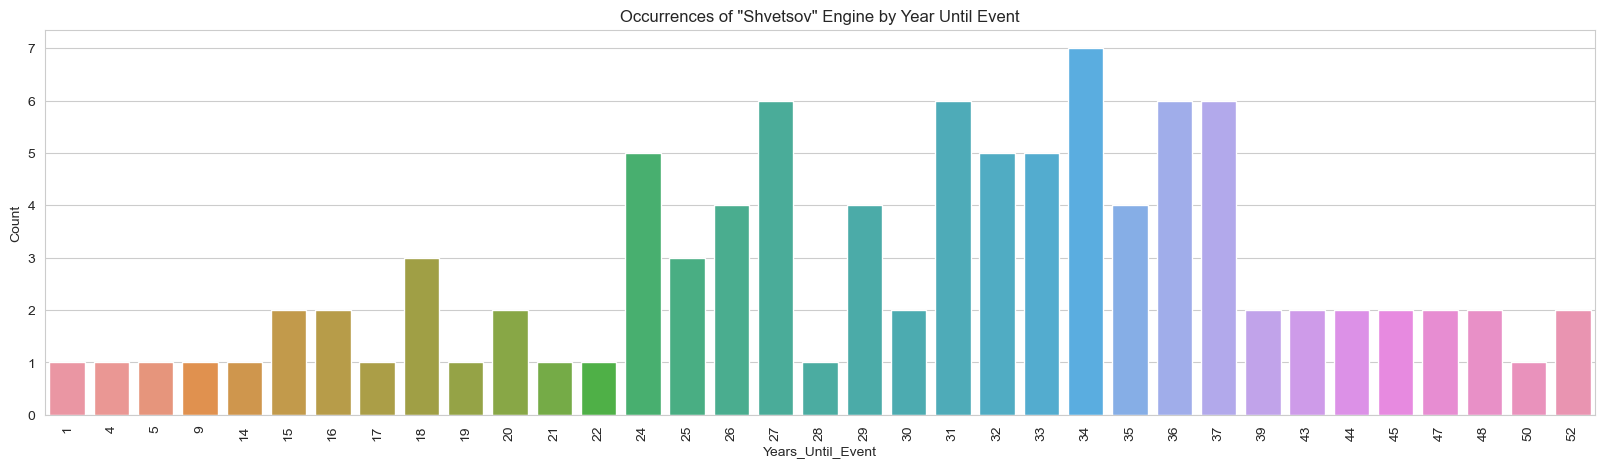

In [57]:
shvetsov_data_Extra = shvetsov_data[shvetsov_data['Years_Until_Event'] < 100]
plt.figure(figsize=(20, 5))
sns.countplot(data=shvetsov_data_Extra, x='Years_Until_Event')
plt.xticks(rotation=90)
plt.title('Occurrences of "Shvetsov" Engine by Year Until Event')
plt.ylabel('Count')
plt.show()

This graph shows the time between the years of the first flight and the events, depicted in years only for planes that use the "Shvetsov" engine.

In [59]:
shvetsov_data_Extra_avg = shvetsov_data_Extra['Years_Until_Event'].mean()
shvetsov_data_Extra_avg

30.371134020618555

In [58]:
total_fatalities = shvetsov_data['Fatalities'].sum()
total_fatalities

102

We can see that the mean lifetime of planes using the "Shvetsov" engine is 30 years, and there have been fatalities in those incidents.

# Observation 3:

**There's a particular engine that has been consistently associated with aircraft incidents since 2010 ,<br>
it would be necessary to examine various factors to understand why this might be the case.**

**Age of the Aircraft: We mentioned that the mean age of the airplanes involved in incidents with this engine is 30 years. <br>
Older aircraft might have outdated technology or maintenance issues that could contribute to incidents.** 

**Maintenance and Inspection Protocols: The maintenance and inspection protocols for the engines could be insufficient or flawed, leading to issues that aren't being addressed in a timely manner.**


**Technological advances: Advances in aviation technology may have surpassed the capabilities or reliability of this particular engine model.**

### It's very important for companies using those engines to check and carefully consider whether to continue using them to prevent the loss of money and, more importantly, the loss of life.

<a id='top'></a>

<div>
<img src="https://github.com/Chikapikaa/Maxim_data_project/blob/main/Li-2_HA-LIX_AS-62IR_02.jpg?raw=true" width="600"/>
</div>